<a href="https://colab.research.google.com/github/nrussell93/prework-about-me/blob/master/Machine_Learning_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Homework #1


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The cost for given value of theta_0 and theta_1 = 5.524438459196242
Final value of theta = [ 5.71850653 -1.9568206 ]
Cost_history =  [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]


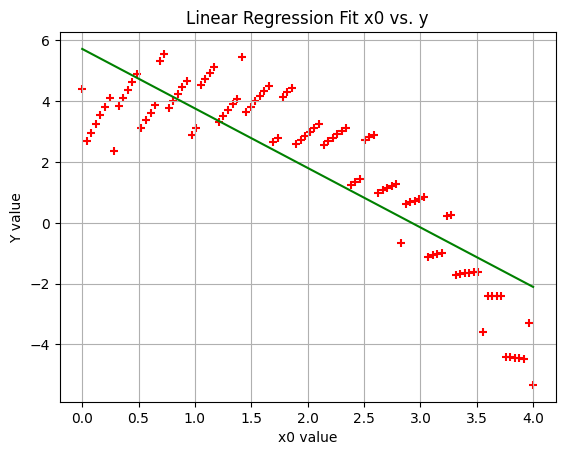

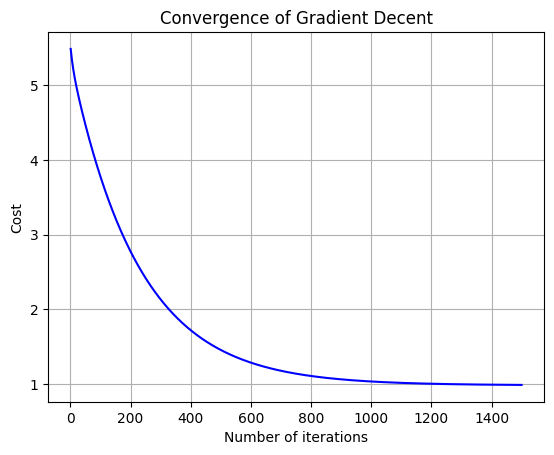

Total cost(loss):  5.524438459196242
Final value of theta:  [0.71988473 0.56390334]
Cost History:  [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]


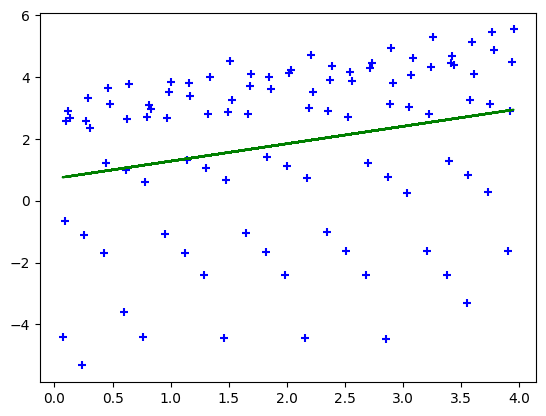

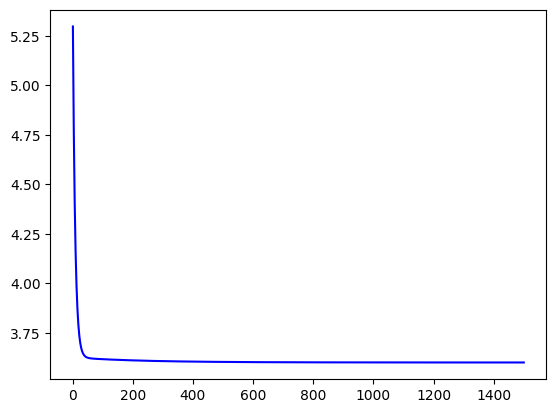

Total inital loss:  5.524438459196242
Final theta value:  [ 2.78048129 -0.48451631]
Cost History:  [5.40768785 5.30397076 5.21178297 ... 3.63053597 3.6305311  3.63052625]


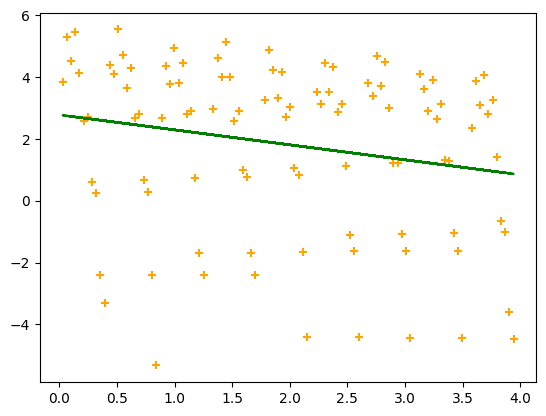

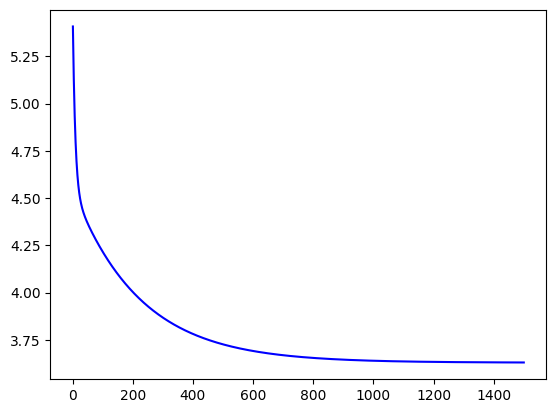

In [ ]:
# Problem 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/D3.csv'
df = pd.read_csv(file_path)

x0 = df.values[:,0]
x1 = df.values[:,1]
x2 = df.values[:,2]
y = df.values[:,3]
l = len(x0)
m = len(x1)
n = len(x2)
p = len(y)

#plt.scatter(x0, y, color='red', marker='+')
#plt.scatter(x1, y, color='blue', marker='+')
#plt.scatter(x2, y, color='green', marker='+')
#plt.show()

# Part 1
# ONLY working on x0 vs y

# Column vector, all 1's --> "bias" term for the linear regression model
xx = np.ones((m,1))
# Reshaping (X's) to make it 2D arrary suitable for matrix operations
# Turning x0 from (m,1) into (1,m)
x_0 = x0.reshape(m,1)
# Horizontally stacking xx and x_0, to create final feature matrix x
x0 = np.hstack((xx, x_0))
# Create array of theta initial values [x_naught, x_1]
theta = [0.,0.]
iterations = 1500
alpha = 0.01

def compute_cost(x0, y, theta, m):
  predictions = x0.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  # J : Scalar value, the cost --> We want to minimize J
  J = (1 / (2*m)) * np.sum(sqrErrors)
  return J

cost = compute_cost(x0, y, theta, m)
print('The cost for given value of theta_0 and theta_1 =', cost)

def gradient_descent(x0, y, theta, alpha, interations, m):
  p = len(y)
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = x0.dot(theta)
    #display('Predictions: ', predictions)
    errors = np.subtract(predictions, y)
    #display('Errors(difference): ', errors)
    sum_delta = (alpha / p) * x0.transpose().dot(errors)
    #sum_delta = (alpha / p) * (np.sum(errors))
    #display('Sum_delta: ', sum_delta)
    theta = theta - sum_delta
    #display('New Theta: ', theta)
    cost_history[i] = compute_cost(x0, y, theta, m)
    #display('Cost History: ', cost_history)
  return theta, cost_history

theta, cost_history = gradient_descent(x0, y, theta, alpha, iterations, m)
print('Final value of theta =', theta)
print('Cost_history = ', cost_history)

plt.scatter(x0[:, 1], y, color = 'red', marker = '+', label = 'Training Data')
plt.plot(x0[:, 1], x0.dot(theta), color = 'green', label = 'Linear Regression')
plt.grid(True)
plt.xlabel('x0 value')
plt.ylabel('Y value')
plt.title('Linear Regression Fit x0 vs. y')
plt.show()

plt.plot(range(1, iterations + 1), cost_history, color = 'blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Convergence of Gradient Decent')
plt.show()

# Part 2
# ONLY work on x1 vs. y

df = pd.read_csv(file_path)
x1 = df.values[:,1]

# Reshape x1 from single column, many rows into --> single row, many columns
x_1 = x1.reshape(m,1)
# Horizontally stack single columns of ones ontop of single row of x_1
x1 = np.hstack((xx,x_1))

# Start the linear regression process.
# Set inital theta values to 0
theta = np.zeros(2)

def lin_reg(x1, y, theta):
  predictions = x1.dot(theta)
  difference = np.subtract(predictions, y)
  squareDifference = np.square(difference)
  J = (1/(2*m)) * np.sum(squareDifference)
  return J

print('Total cost(loss): ', lin_reg(x1, y, theta))

# Begin Gradient Descent process
def grad_desc(x1, y, theta, iterations, m):
  m = len(y)
  cost_history = np.zeros(iterations)
  for i in range(iterations):
    predictions = x1.dot(theta)
    difference = np.subtract(predictions, y)
    sum_difference = (alpha / m) * x1.transpose().dot(difference)
    theta = theta - sum_difference
    cost_history[i] = lin_reg(x1, y, theta)
  return theta, cost_history

theta, cost_history = grad_desc(x1, y, theta, iterations, m)
print('Final value of theta: ', theta)
print('Cost History: ', cost_history)

# Develop graph of training set and linear model
plt.scatter(x1[:,1], y, color='blue', marker='+')
plt.plot(x1[:,1], x1.dot(theta), color = 'green', label = 'Linear Regression')
plt.show()

# Develop ground of iterations vs. cost
plt.plot(range(1, iterations + 1), cost_history, color = 'blue')
plt.show()

# Part 3
# ONLY work on x2 vs. y

x_2 = x2.reshape(m,1)
x2 = np.hstack((xx,x_2))
x2[:5]

# Set inital theta values to zero
theta = np.zeros(2)

# Begin Linear Regression
def lin_reg(x2, y, theta, m):
  guess = x2.dot(theta)
  loss = np.subtract(guess, y)
  squareLoss = np.square(loss)
  J = (1 / (2*m)) * np.sum(squareLoss)
  return J

print('Total inital loss: ', lin_reg(x2, y, theta, m))

# Begin Gradient Descent process to minimize loss
def grad_descent(x2, y, theta, iterations, m):
  cost_history = np.zeros(iterations)
  m = len(y)
  for i in range(iterations):
    predictions = x2.dot(theta)
    loss = np.subtract(predictions, y)
    sum_delta = (alpha / m) * x2.transpose().dot(loss)
    theta = theta - sum_delta
    cost_history[i] = lin_reg(x2, y, theta, m)
  return theta, cost_history

theta, cost_history = grad_descent(x2, y, theta, iterations, m)
print('Final theta value: ', theta)
print('Cost History: ', cost_history)

# Display graph x2 vs. y and the linear model with minimal loss
plt.scatter(x2[:,1], y, color = 'orange', marker = '+')
plt.plot(x2[:,1], x2.dot(theta), color = 'green', label = 'Linear Regression')
plt.show()

# Display iterations vs. loss graph showing that as the losses decreased
# as Gradient Descent was repeatidly performed

plt.plot(range(1, iterations +1), cost_history, color = 'blue')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Initial loss:  5.524438459196242
Final loss value:  [ 5.27871829 -1.99871153  0.53842104 -0.26040578]
Cost History:  [5.21542243 4.97171977 4.7765543  ... 0.73853145 0.73853131 0.73853118]


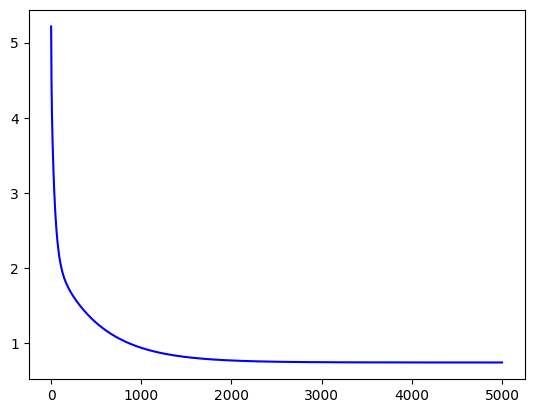

y(1,1,1) =  3.558022029701271
y(2,0,4) =  0.2396721164017015
y(3,2,1) =  0.09902001717238568


In [ ]:
# Problem 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/D3.csv'
df = pd.read_csv(file_path)
x0 = df.values[:,0]
x1 = df.values[:,1]
x2 = df.values[:,2]
y = df.values[:,3]
m = len(y)
theta = np.zeros(4)
iterations = 5000
alpha = 0.01
xx = np.ones((m,1))
x_0 = x0.reshape(m,1)
x_1 = x1.reshape(m,1)
x_2 = x2.reshape(m,1)
X = np.hstack((xx,x_0,x_1,x_2))
#X[:5]
# X is new matrix -> 100x4
#np.shape(X)

# Begin Linear Regression model using initial theta values of all zeros
def linear_regression(X, y, theta, m):
  predictions = X.dot(theta)
  loss = np.subtract(predictions, y)
  squareLoss = np.square(loss)
  J = (1 / (2*m)) * np.sum(squareLoss)
  return J

print("Initial loss: ", linear_regression(X, y, theta, m))

# Begin Gradient Descent to minimize loss
def grad_desc(X, y, theta, iterations, alpha, m):
  m = len(y)
  cost_history = np.zeros(iterations)
  for i in range(iterations):
    predictions = X.dot(theta)
    loss = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(loss)
    theta = theta - sum_delta
    cost_history[i] = linear_regression(X, y, theta, m)
  return theta, cost_history

theta, cost_history = grad_desc(X, y, theta, iterations, alpha, m)
print('Final loss value: ', theta)
print('Cost History: ', cost_history)

# Display the training set vs. ground truth, and attach Linear Model
#plt.scatter(X[:, 0], y, color = 'red', marker = '+', label = 'Training Data')
#plt.scatter(X[:, 1], y, color = 'red', marker = '+', label = 'Training Data')
#plt.scatter(X[:, 2], y, color = 'red', marker = '+', label = 'Training Data')
#plt.scatter(X[:, 3], y, color = 'red', marker = '+', label = 'Training Data')
#plt.plot(X[:, 1], X.dot(theta), color = 'green', label = 'Linear Regression')
#plt.show()

# Display iterations vs. loss graph
plt.plot(range(1, iterations + 1), cost_history, color = 'blue')
plt.show()

# Part 4
# Hypothetical values for X1,X2,X3 (1,1,1)
# Input a value of 1 for X0 value and create 1x4 matrix
a = np.array([1, 1, 1, 1])
#np.shape(a)
# Predict y value(output value) with this data
y_1 = a.dot(theta)
print('y(1,1,1) = ', y_1)

b = np.array([1, 2, 0, 4])
y_2 = b.dot(theta)
print('y(2,0,4) = ', y_2)

c = np.array([1, 3, 2, 1])
y_3 = c.dot(theta)
print('y(3,2,1) = ', y_3)


